# 파이썬 6월 6일 강의 복습
> "7월 12일"

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최석진
- categories: [Python]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 클래스 공부 7단계

### 함수공부

`-` 함수

In [3]:
def f(x):
    return x+1

In [4]:
f(3)

4

`-` 함수의 사용방법?
- 입력으로 변수 x를 받음 = 입력으로 인스턴스 x를 받음.
- 출력으로 변수 x+1을 리턴 = 출력으로 인스턴스 x+1을 리턴.

`-` 사실1 : 파이썬에서 함수는 인스턴스를 입력으로 받고 인스턴스를 출력한다.

`-` 함수의 자료형?

In [5]:
f?

Signature: f(x)
Docstring: <no docstring>
File:      /var/folders/l1/qgzhh1fs7tsg8pkmzspwgkyw0000gn/T/ipykernel_204/1304018138.py
Type:      function


- type이 function임.
- f는 function class의 instance이다.
- f 역시 하나의 오브젝트

`-` 사실2 : 함수도 결국 인스턴스이다. -> 함수의 입력으로 함수를 쓸 수도 있고 함수의 출력으로 함수가 나올 수도 있다.

### 함수형 프로그래밍

(예제1) 숫자입력, 함수입력

In [6]:
def f(a):
    def _f(x):
        return (x-a)**2
    return _f

In [7]:
g=f(10) # g(x)=(x-10)**2

In [8]:
g(2) ##(2-10)**2 =64

64

- 해석 : f(a)는 a를 입력으로 받고 g(x)=(x-a)^2 를 함수를 리턴해주는 함수

(예제1)의 다른표현 : 익명함수 lamda

표현1

In [9]:
def f(a):
    _f = lambda x:(x-a)**2 ###lambda x:(x-a)**2 가 실행되는 순간 함수오브젝트가 만들어지고 그것이 _f로 저장됨
    return _f

In [10]:
g=f(10) #g(x)=(x-10)**2

In [11]:
g(3) #(3-10)**2 =49

49

표현2

In [12]:
def f(a):
    return lambda x: (x-a)**2

In [13]:
g=f(10) #g(x)=(x-10)**2

In [14]:
g(3) #(3-10)**3 = 49

49

- `lambda x: (x-a)**2`는 $lambda(x)=(x-a)^2$의 느낌으로 기억하면 외우기 쉽다.
- `lambda x: (x-a)**2`는 "아직 이름이 없는 함수오브젝트를 (가칭 lambda 라고 하자) 만들고 기능은 x를 입력하고 (x-a)^2를 출력하도록 하자" 라는 뜻으로 해석하면 된다.

(예제2) 함수입력,숫자출력

In [15]:
def f(x):
    return x**2

In [16]:
def d(f,x): #함수를 입력받는 함수를 정의
    h=0.000000000001
    return (f(x+h)-f(x))/h

In [17]:
d(f,4) #f'(4)=2*4=8

8.000711204658728

(예제3) 함수입력,함수출력

In [18]:
def f(x):
    return x**2

In [19]:
def derivate(f):
    def df(x):
        h=0.000000001
        return (f(x+h)-f(x))/h
    return df

In [20]:
ff=derivate(f)

In [21]:
ff(7) ##f의 도함수

14.000001158365194

### **원래함수의 시각화**

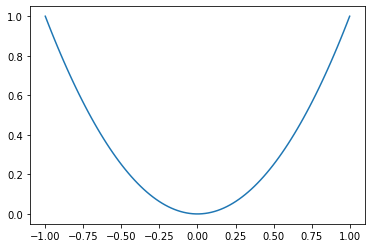

In [22]:
x=np.linspace(-1,1,100)
plt.plot(x,f(x))

### **도함수 시각화**

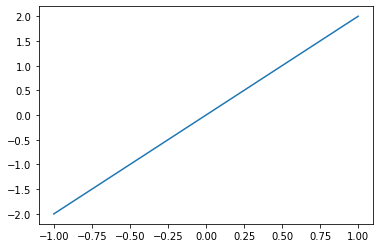

In [23]:
x=np.linspace(-1,1,100)
plt.plot(x,ff(x))

(예제3)의 다른표현

In [24]:
def f(x):
    return x**2

In [25]:
def derivate(f):
    h=0.00000001
    return lambda x:(f(x+h)-f(x))/h

In [26]:
ff=derivate(f)

In [27]:
ff(10)

20.00000165480742

(예제4) 함수들의 리스트

In [29]:
flst=[lambda x:x,lambda x:x**2, lambda x:x**3]
flst

[<function __main__.<lambda>(x)>,
 <function __main__.<lambda>(x)>,
 <function __main__.<lambda>(x)>]

In [30]:
for f in flst:
    print(f(2))

2
4
8


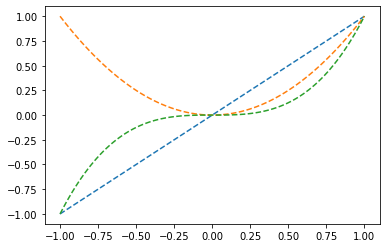

In [31]:
for f in flst:
    plt.plot(x,f(x),'--')

위 코드와 동일

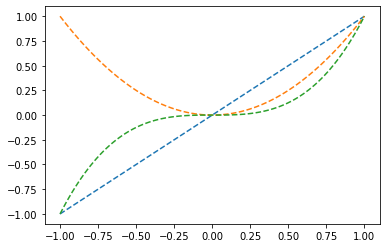

In [32]:
plt.plot(x,(lambda x:x)(x),'--')
plt.plot(x,(lambda x:x**2)(x),'--')
plt.plot(x,(lambda x:x**3)(x),'--')

### 정리

`-` 지금까지 개념
- 함수:변수를 입력으로 받아서 변수를 출력하는 개념
- 변수:어떤 값을 저장하는 용도로 쓰거나 함수의 입력 혹은 출력으로 사용

`-` 파이썬의 함수형프로그래밍을 잘하려면?
- 변수든 함수이든 둘다 인스턴스임.
- 변수를 함수처럼: 메소드
- 함수를 변수처럼($\star$): 함수자체를 함수의 입력으로 혹은 출력으로 쓸 수도 있음. 함수를 특정값처럼 생각해서 함수들의 list를 만들 수 있다.

### callable object

`-` 함수오브젝트의 비밀?

In [34]:
f= lambda x:x+1

In [35]:
lst=[1,2,3]

In [36]:
set(dir(f))&{'__call__'}

{'__call__'}

- 함수 오브젝트에는 숨겨진 기능 `__call__`이 있다.

In [37]:
f.__call__(3) #f(3)

4

- 여기에 우리가 정의한 내용이 있다.

`-` 함수처럼 쓸 수 없는 인스턴스는 단지 call이 없는 것일 뿐이다.

In [38]:
class Klass:
    def __init__(self):
        self.name='seokjin'

In [39]:
a=Klass()

In [40]:
a()

TypeError: 'Klass' object is not callable

- a는 callable이 아니라고 한다.

In [41]:
class Klass2(Klass): #상속
    def __call__(self):
        print(self.name)

In [42]:
b=Klass2()

In [43]:
b()

seokjin


- b는 callable object. 즉, 숨겨진 메소드로 `__call__`를 가진 오브젝트
- Klass는 callable object를 만들지 못하지만 Klass2는 callable object를 만든다.

`-` 클래스로 함수 만들기

In [44]:
class AddConstant:
    def __init__(self,c):
        self.c=c
    def __call__(self,a):
        return a+self.c

In [45]:
f=AddConstant(3) #callable object생성, f.c에는 3이 저장

In [46]:
f(5)

8

- 클래스도 `오브젝트` 였음. -> 클래스도 함수처럼 `Klass()`와 같이 사용하면 인스턴스를 만들었음 -> `Klass.__call__()`은 `Klass()`와 같은 역할을 할 것이다.

In [48]:
class Klass:
    def __init__(self):
        self.name='jin'

In [50]:
a=Klass.__call__() # 이것이 a=Klass()와 같은 효과

In [51]:
a.name

'jin'

### 파이썬의 비밀 1~4

- 파이썬의 비밀1:자료형은 클래스의 이름이다.
- 파이썬의 비밀2:클래스에는 `__str__`처럼 숨겨진 메소드가 존재한다. 이를 이용하여 파이썬 내부의 기능을 가로챌 수 있다.
- 파이썬의 비밀3:주피터노트북에서는 "오브젝트이름+엔터"를 쳐서 나오는 출력은 `__repr__`로 가로챌 수 있다.(주피터의 비밀)
- 파이썬의 비밀4:함수와 클래스는 숨겨진 메소드에 `__call__`을 가진 오브젝트일 뿐이다.

## 클래스공부 8단계

### for문의 복습

`-` 아래의 예제들을 관찰하여 for문을 복습

(예제1)

In [52]:
for i in [1,2,3,4]:
    print(i)

1
2
3
4


(예제2)

In [53]:
for i in (1,2,3,4):
    print(i)

1
2
3
4


(예제3)

In [54]:
for i in'1234':
    print(i)

1
2
3
4


(예제4)

In [56]:
a=5
for i in a:
    print(a)

TypeError: 'int' object is not iterable

`-` 의문1:

``` python
for i in ???:
    print(i)
```
에서 ??? 자리에 올 수 있는 것이 무엇일까?

(예제5)

In [57]:
lst=[[1,2,3,4],[3,4,5,6]]
for l in lst:
    print(l)

[1, 2, 3, 4]
[3, 4, 5, 6]


In [58]:
df=pd.DataFrame(lst)
df

,0,1,2,3
0,1,2,3,4
1,3,4,5,6


In [59]:
for i in df:
    print(i)

0
1
2
3


칼럼이름들이 나오는 것 같음 -> 확인.

In [60]:
df.columns=pd.Index(['X'+str(i) for i in range(1,5)])
df

,X1,X2,X3,X4
0,1,2,3,4
1,3,4,5,6


In [61]:
for i in df:
    print(i)

X1
X2
X3
X4


`-` 의문2: for의 출력결과는 어떻게 예측할 수 있을까?

### for문의 동작원리

`-` 의문1의 해결: 아래의???자리에 올수 있는 것은 dir()해서 `__iter__`가 있는 object이다.

```python
for i in ???:
    print(i)
```

이러한 오브젝트를 iterable object라고 한다.

`-` 확인

In [62]:
a=[1,2,3]
set(dir(a)) & {'__iter__'}

{'__iter__'}

In [63]:
a=1,2,3
set(dir(a)) & {'__iter__'}

{'__iter__'}

In [64]:
a='123'
set(dir(a)) & {'__iter__'}

{'__iter__'}

In [65]:
a=5
set(dir(a)) & {'__iter__'}

set()

- 예상대로 예제1~4에서는 int의 클래스 instance만 `__iter__`가 없다.

`-` `__iter__`의 역할:iterable object를 iterator로 만들 수 있다!

In [66]:
lst=[1,2,3]
lst

[1, 2, 3]

In [67]:
lst[1]

2

In [68]:
ltor=iter(lst)
#ltor=lst.__iter__()
ltor

In [69]:
ltr[1] #더이상 리스트가 아니다

NameError: name 'ltr' is not defined

In [70]:
ltor?

Type:        list_iterator
String form: <list_iterator object at 0x7fcd78f09b50>
Docstring:   <no docstring>


`-` iterator가 되면 무엇이 좋은가? -> 숨겨진 기능 `__next__`가 열림.

In [72]:
set(dir(lst)) & {'__next__'}, set(dir(ltor)) &{'__next__'}

(set(), {'__next__'})

- lst에는 `__next__`가 없지만 ltor에는 있다

`-` 그래서 `__next__`의 기능은? -> 원소를 차례대로 꺼내준다 + 더이상 꺼낼 원소가 없으면 StopIteraion Error를 발생시킨다.

In [73]:
lst

[1, 2, 3]

In [74]:
ltor.__next__()

1

In [75]:
ltor.__next__()

2

In [76]:
ltor.__next__()

3

In [77]:
ltor.__next__()

StopIteration: 

`-` for문의 동작원리

```python
for i in lst:
    print(i)
```

(1) `lst.__iter__()` or `iter(lst)`를 이용하여 lst를 iterator로 만든다. (iterable object -> iterator object)

(2) iterator에서 `.__next__()`함수를 호출하고 결과를 i에 저장한 뒤에 for문 블록안에 있는 내용 (들여쓰기 된 내용)을 실행 -> 반복

(3) StopIteration 에러가 발생하면 for문을 멈춘다.

`-` 아래의 ??? 자리에 올 수 있는 것이 iterable object가 아니라 iterator 자체여도 for문이 돌아갈까? (당연히 돌아가야 할 것 같음)

```python
for i in ???:
    print(i)
```

In [78]:
for i in iter([1,2,3]):
    print(i)

1
2
3


- 당연히 가능!

`-` a가 iterator일때 iter(a)의 출력결과가 a와 같도록 조정한다면 for문의 동작원리 (1)~(3)을 수정하지 않아도 좋다 -> 실제로 이렇게 동작한다

`-` 요약
- iterable object는 숨겨진 기능으로 `__iter__`를 가진다.
- iterator object는 숨겨진 기능으로 `__iter__`와 `__next__`를 가진다. (즉 iterator는 그 자체로 iterable object가 된다!)

In [79]:
lst=[1,2,3]
ltor=iter(lst)

In [80]:
set(dir(lst)) & {'__iter__','__next__'}

{'__iter__'}

In [81]:
set(dir(ltor)) & {'__iter__','__next__'}

{'__iter__', '__next__'}

`-` 의문2의 해결: for의 출력결과는 어떻게 예측할 수 있을까? iterator를 만들어서 `.__next__()`의 출력값을 확인하면 알 수 있다.

In [82]:
for i in df:
    print(i)

X1
X2
X3
X4


In [83]:
dftor=iter(df)
dftor.__next__()

'X1'

In [84]:
dftor.__next__()

'X2'

In [85]:
dftor.__next__()

'X3'

In [86]:
dftor.__next__()

'X4'

In [87]:
dftor.__next__()

StopIteration: 

### range()

`-` 파이썬에서 for문을 처음 배울 때: range(5)를 써라!

In [88]:
for i in range(5):
    print(i)

0
1
2
3
4


- range(5)가 무엇?

`-` `range(5)`의 정체는 그냥 iterable object이다.

In [89]:
set(dir(range(5))) & {'__iter__','__next__'}

{'__iter__'}

`-` 그래서 언제든지 iterator로 바꿀 수 있다.

In [91]:
rtor=iter(range(5))
rtor

In [92]:
set(dir(rtor)) & {'__iter__','__next__'}

{'__iter__', '__next__'}

`-` for문에서 range(5)가 행동하는 방법?

In [93]:
rtor=iter(range(5))

In [94]:
rtor.__next__()

0

In [95]:
rtor.__next__()

1

In [96]:
rtor.__next__()

2

In [97]:
rtor.__next__()

3

In [98]:
rtor.__next__()

4

In [99]:
rtor.__next__()

StopIteration: 

### zip

`-` iterator의 개념을 알면 for문에 대한 이해도가 대폭 상승한다.

In [100]:
for i in zip([1,2,3],'abc'):
    print(i)

(1, 'a')
(2, 'b')
(3, 'c')


- zip은 뭐지?

In [101]:
zip([1,2,3],'abc')

`-` 어차피 `for i in ???`:의 ???자리는 iterable object의 자리이다.

In [102]:
set(dir(zip([1,2,3],'abc'))) & {'__iter__','__next__'}

{'__iter__', '__next__'}

- `__next__()`함수가 있음 $\to$ `zip([1,2,3],'abc')`은 그 자체로 iterator

In [103]:
z=zip([1,2,3],'abc')

In [104]:
z.__next__()

(1, 'a')

In [105]:
z.__next__()

(2, 'b')

In [106]:
z.__next__()

(3, 'c')

In [107]:
z.__next__()

StopIteration: 

### 사용자정의 iterator

In [139]:
class Klass: #찌를 내는 순간 for문이 멈추도록 하는 iterator를 만듦
    def __init__(self):
        self.candidate=['묵','찌','빠']
    def __iter__(self):
        return self
    def __next__(self):
        action=np.random.choice(self.candidate)
        if action == '찌':
            print("찌가 나와 for문을 멈춥니다.")
            raise StopIteration
        else:
            return action

In [140]:
a=Klass()

In [127]:
set(dir(a)) & {'__iter__','__next__'} #a는 iterator

{'__iter__', '__next__'}

In [128]:
a.__next__()

'빠'

In [129]:
a.__next__()

'묵'

In [130]:
a.__next__()

'빠'

In [131]:
a.__next__()

'빠'

In [132]:
a.__next__()

'빠'

In [133]:
a.__next__()

찌가 나와 for문을 멈춥니다.


StopIteration: 

In [141]:
for i in a:
    print(i)

빠
찌가 나와 for문을 멈춥니다.


### 파이썬의 비밀 1~5

- 파이썬의 비밀1 : 자료형은 클래스의 이름이다.
- 파이썬의 비밀2 : 클래스에는 `__str__`처럼 숨겨진 메소드가 존재하낟. 이를 이용하여 파이썬 내부의 기능을 가로챌 수 있다.
- 파이썬의 비밀3 : 주피터노트북에서는 "오브젝트이름+엔터"를 쳐서 나오는 출력은 `__repr__`로 가로챌 수 있다. (주피터의 비밀)
- 파이썬의 비밀4 : 함수와 클래스는 숨겨진 메소드에 `__call__`을 가진 오브젝트일 뿐이다.
- 파이썬의 비밀5 : for문의 비밀(iterable object, iterator, StopIteration Error)